<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML04_06_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold

In [70]:
#%pip install openpyxl

In [71]:
df = pd.read_csv(r'NY-House-Dataset.csv',sep=';',
                 index_col =  False,
                 on_bad_lines='skip')


In [72]:
headers = pd.read_csv(r'NY-House-Dataset.csv', sep=';',nrows=0)
header_names = headers.columns.tolist()

In [73]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [74]:
column_rename_dict = {old_name: new_name for old_name, new_name in zip(df.columns, header_names)}

df.rename(columns=column_rename_dict, inplace=True)

In [75]:
print(df['BEDS'])

0       2
1       7
2       4
3       3
4       7
       ..
4796    1
4797    1
4798    1
4799    2
4800    1
Name: BEDS, Length: 4801, dtype: int64


In [76]:
str_col = ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME' , 'LONG_NAME', 'FORMATTED_ADDRESS']
int_col = ['BEDS', 'BATH','PROPERTYSQFT']
float_col = ['PRICE']

In [79]:
df[str_col] = df[str_col].apply(lambda x: x.astype(str))

In [80]:
df[int_col] = df[int_col].apply(lambda x: x.astype(int))

In [81]:
df[float_col] = df[float_col].apply(lambda x: x.astype(float))

In [82]:
df.drop_duplicates(inplace = True)


In [83]:
df.loc[df['BATH'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [84]:
df.loc[df['PRICE'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [85]:
df.loc[df['BEDS']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [86]:
df.loc[df['PROPERTYSQFT']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [87]:
df['FORMATTED_ADDRESS'] = df['FORMATTED_ADDRESS'].apply(lambda x: x.replace('#', ''))


In [88]:
le = LabelEncoder()

In [89]:
columns_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME']

In [90]:
df[columns_to_encode] = df[columns_to_encode].apply(LabelEncoder().fit_transform)

In [91]:
df.to_excel('test.xlsx')

In [92]:
df.dtypes

BROKERTITLE                     object
TYPE                             int32
PRICE                          float64
BEDS                             int32
BATH                             int32
PROPERTYSQFT                     int32
ADDRESS                         object
STATE                            int32
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2      int32
LOCALITY                         int32
SUBLOCALITY                      int32
STREET_NAME                      int32
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [93]:
X = df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE','STATE','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','SUBLOCALITY','STREET_NAME','LONGITUDE','LATITUDE',]]
y = df['PRICE']

In [94]:
for column in  X:
  df[column]=np.abs(df[column])
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3- Q1
  df = df.drop(df.loc[df[column] > (Q3 + 1.5 * IQR)].index)
  df = df.drop(df.loc[df[column] < (Q1- 1.5 * IQR)].index)

In [95]:
X = X.dropna()
y = y[X.index]


In [96]:
print(df['BEDS'])

0       2
3       3
6       2
11      3
14      3
       ..
4793    2
4794    2
4796    1
4797    1
4798    1
Name: BEDS, Length: 1868, dtype: int32


<Axes: >

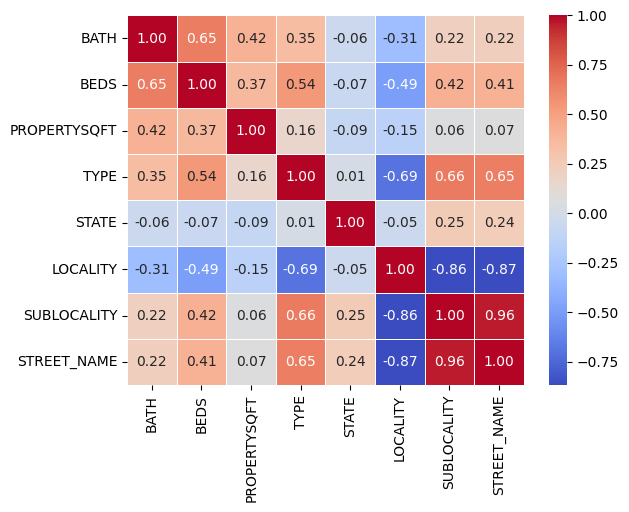

In [97]:
selected_df =  df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE','STATE','LOCALITY','SUBLOCALITY','STREET_NAME',]]
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

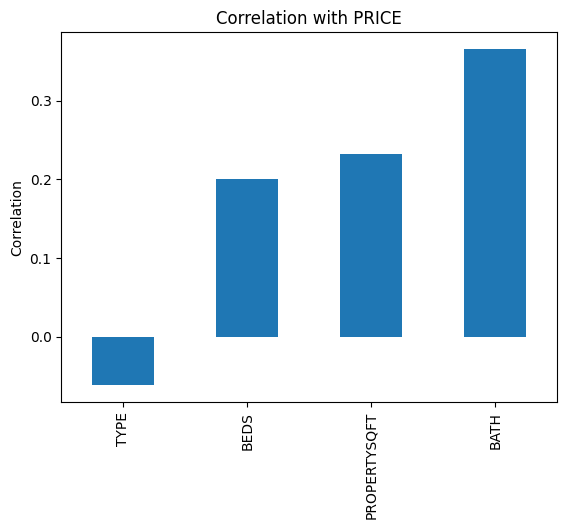

In [98]:
# Select the columns
cor_df = df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE', 'PRICE',]]

# Calculate the correlation with 'PRICE'
correlation = cor_df.corr()['PRICE'].drop('PRICE')

# Plot the correlation values
correlation.sort_values().plot(kind='bar')
plt.title('Correlation with PRICE')
plt.ylabel('Correlation')
plt.show()

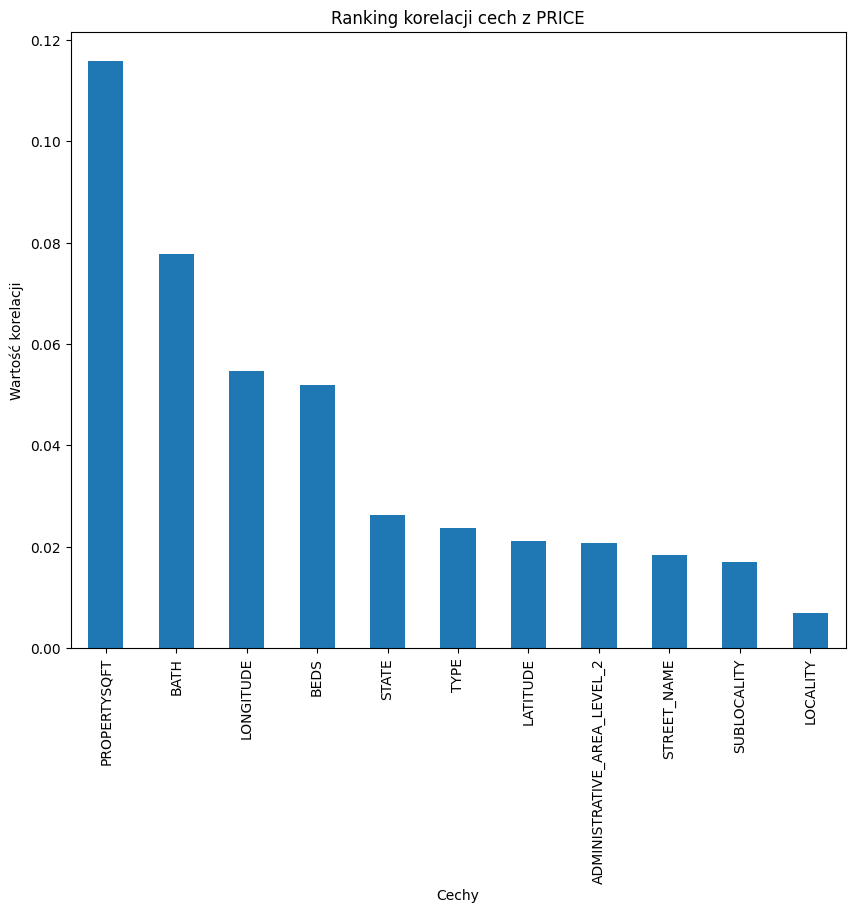

In [99]:
corellaction_df = pd.concat([X, y], axis=1)
corr_price = corellaction_df.corr()['PRICE'].drop('PRICE').abs()
corr_price_sort = corr_price.sort_values(ascending=False)

# Wykres korelacji
corr_price_sort.plot.bar(figsize=(10, 8))
plt.title('Ranking korelacji cech z PRICE')
plt.xlabel('Cechy')
plt.ylabel('Wartość korelacji')
plt.show()

In [100]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,2,315000.0,2,2,1400,2 E 55th St Unit 803,207,"2 E 55th St Unit 803New York, NY 10022",26,4,10,56,Regis Residence,"Regis Residence, 2 E 55th St 803, New York, NY...",40.761255,73.974483
3,Brokered by COMPASS,2,69000.0,3,1,445,2 E 55th St Unit 908W33,161,"2 E 55th St Unit 908W33Manhattan, NY 10022",28,4,12,117,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,73.974613
6,Brokered by Douglas Elliman - 575 Madison Ave,2,899500.0,2,2,2184,157 W 126th St Unit 1B,212,"157 W 126th St Unit 1BNew York, NY 10027",25,5,11,101,157,"157 W 126th St 1b, New York, NY 10027, USA",40.809448,73.946777
11,Brokered by Re/Max Edge,12,689000.0,3,2,1162,456 Van Name Ave,293,"456 Van Name AveStaten Island, NY 10303",28,4,16,153,Van Name Avenue,"456 Van Name Ave, Staten Island, NY 10303, USA",40.624996,74.155306
14,Brokered by Corcoran Chelsea/Flatiron,0,895000.0,3,1,2184,61 Jane St Apt 6N,201,"61 Jane St Apt 6NNew York, NY 10014",25,5,11,101,61,"61 Jane St 6n, New York, NY 10014, USA",40.738298,74.005890


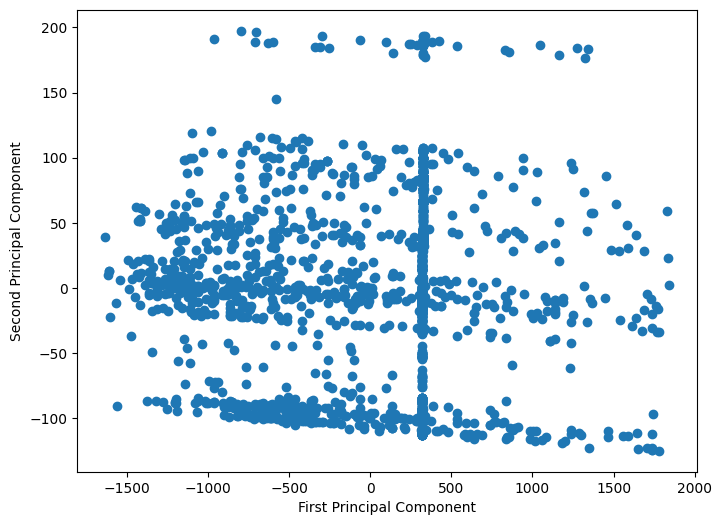

In [101]:

selected_df = selected_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_df)
df_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])


plt.figure(figsize=(8,6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [102]:
df.dtypes

BROKERTITLE                     object
TYPE                             int32
PRICE                          float64
BEDS                             int32
BATH                             int32
PROPERTYSQFT                     int32
ADDRESS                         object
STATE                            int32
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2      int32
LOCALITY                         int32
SUBLOCALITY                      int32
STREET_NAME                      int32
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.coef_
reg.intercept_
y_predict = reg.predict(X_test)

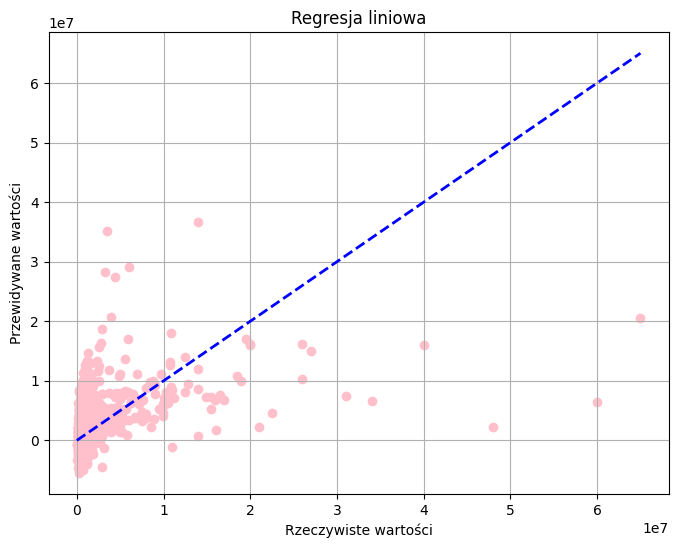

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja liniowa')
plt.grid(True)
plt.show()

In [105]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import  HuberRegressor

In [106]:
y_true = y_test
mean_absolute_error(y_true,y_predict)

2576862.402256144

In [107]:
y_true = y_test
median_absolute_error(y_true,y_predict)

1490025.2756118774

SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 17%

In [108]:
y_true = y_test
r2_score(y_true,y_predict)

-0.21771359588764438

In [109]:
huber = HuberRegressor().fit(X_train, y_train)
huber.coef_
huber.intercept_
y_predict_huber = huber.predict(X_test)

c:\Users\jabko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [110]:
y_true = y_test
mean_absolute_error(y_true,y_predict_huber)

1155497.3083040495

In [111]:

y_true = y_test
median_absolute_error(y_true,y_predict_huber)


339436.70838120626

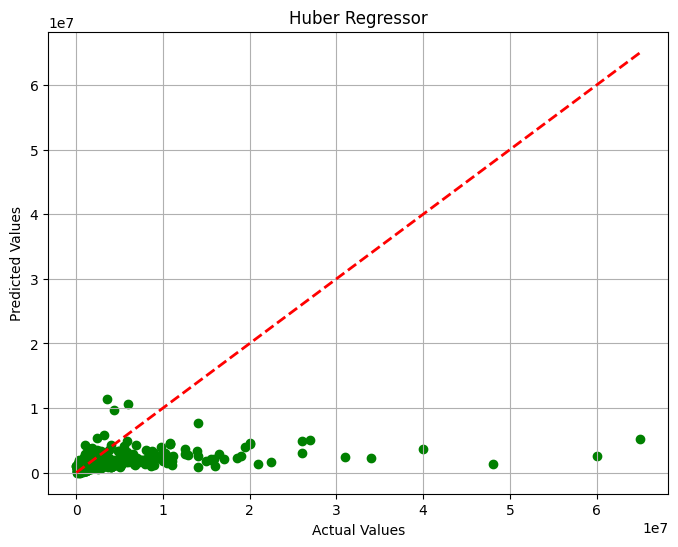

In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_huber, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Huber Regressor')
plt.grid(True)
plt.show()

In [113]:
huber_model = HuberRegressor().fit(X_train, y_train)
huber_model.score(X_train, y_train)
huber_model.coef_
huber_model.intercept_
predictions_huber = np.round(huber_model.predict(X_test))
print(predictions_huber)

[ 332362. 1190632. 1247808. ... 1639812. 1039761.  655193.]


c:\Users\jabko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 19% Nie wiem dlaczego za kazdym razem, gdy włączymy od nowa plik wyniki są różne, chyba ze wzgledu na dobieranie testowego modelu


In [114]:
y_true = y_test
r2_score(y_true,y_predict_huber)

0.11821091859202726

In [115]:
huber = HuberRegressor().fit(X_train,y_train)
huber.score(X_train,y_train)
huber.coef_
huber.intercept_
y_predic_huber = np.round(huber.predict(X_test))
print (y_predic_huber)

c:\Users\jabko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[ 332362. 1190632. 1247808. ... 1639812. 1039761.  655193.]


In [116]:
from sklearn.model_selection import cross_val_score
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lin = LinearRegression()
cv_scores = cross_val_score(lin, X , y, cv=rkf, scoring='r2')
print(cv_scores)

[-9.18435224e-02 -1.05362119e+00 -2.87477840e-02  6.41939725e-03
 -3.77559799e-01  5.90037957e-03 -3.46952981e-02  2.21473743e-01
 -7.60701932e+00 -9.20365773e-01 -3.03872134e-01 -1.53104947e-01
  6.17268860e-03 -7.52030295e-01 -4.28749523e-01]


Wielomian drugiego i trzeciego stopnia, regresja.

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [118]:
degree2_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])
degree2_pipeline.fit(X_train, y_train)
predictions_degree2 = degree2_pipeline.predict(X_test)
r2_degree2 = r2_score(y_test, predictions_degree2)
print("Wynik R^2 dla regresji 2. stopnia:", r2_degree2)

Wynik R^2 dla regresji 2. stopnia: -21.253504677434574


In [119]:

repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_2 = PolynomialFeatures(2)
X_transformed = poly_features_2.fit_transform(X)
cross_val_scores_2nd_degree = cross_val_score(linear_model, X_transformed, y, cv=repeat_kfold, scoring='r2')
print(cross_val_scores_2nd_degree)

[-9.63200600e+00 -3.40788553e+02 -3.35053007e+01 -4.11731480e-03
 -8.97605221e+00 -3.94182505e-03 -9.09262764e+01 -9.03616011e+00
 -1.83331725e+02 -3.07170814e+01 -3.01555360e+01 -1.31089541e+01
 -2.18977660e-03 -2.33760333e+02 -1.04771465e+01]


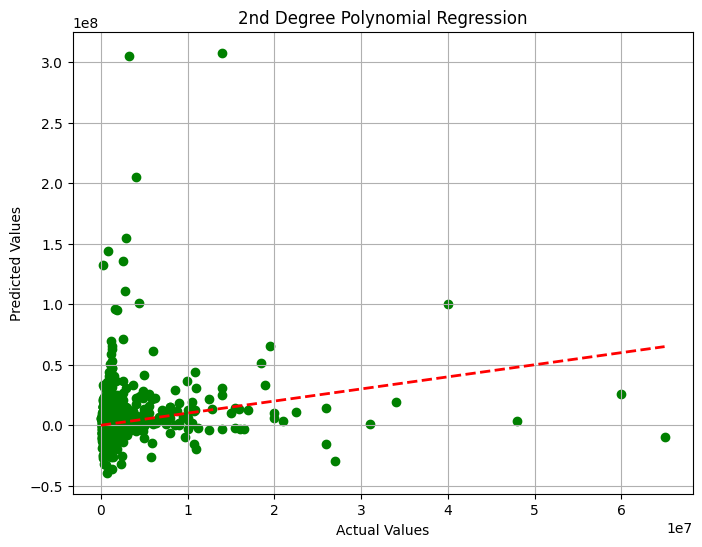

In [120]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree2, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('2nd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [121]:
#3 stopien

degree3_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])


degree3_pipeline.fit(X_train, y_train)


predictions_degree3 = np.round(degree3_pipeline.predict(X_test))


print(predictions_degree3)
print("3 stopien r2 ", degree3_pipeline.score(X_test, y_test))

[ 1618620. -5597130. -1665328. ...  2374654. 16097793.  1811249.]
3 stopien r2  -393.62222062764084


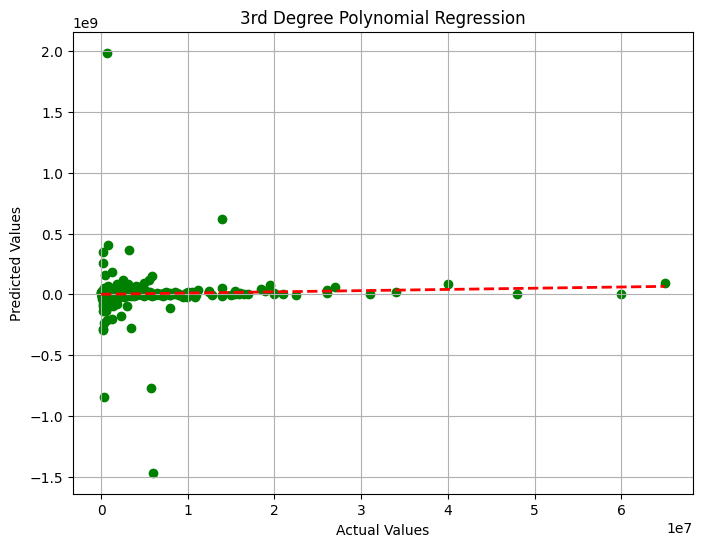

In [122]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('3rd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [123]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,2,315000.0,2,2,1400,2 E 55th St Unit 803,207,"2 E 55th St Unit 803New York, NY 10022",26,4,10,56,Regis Residence,"Regis Residence, 2 E 55th St 803, New York, NY...",40.761255,73.974483
3,Brokered by COMPASS,2,69000.0,3,1,445,2 E 55th St Unit 908W33,161,"2 E 55th St Unit 908W33Manhattan, NY 10022",28,4,12,117,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,73.974613
6,Brokered by Douglas Elliman - 575 Madison Ave,2,899500.0,2,2,2184,157 W 126th St Unit 1B,212,"157 W 126th St Unit 1BNew York, NY 10027",25,5,11,101,157,"157 W 126th St 1b, New York, NY 10027, USA",40.809448,73.946777
11,Brokered by Re/Max Edge,12,689000.0,3,2,1162,456 Van Name Ave,293,"456 Van Name AveStaten Island, NY 10303",28,4,16,153,Van Name Avenue,"456 Van Name Ave, Staten Island, NY 10303, USA",40.624996,74.155306
14,Brokered by Corcoran Chelsea/Flatiron,0,895000.0,3,1,2184,61 Jane St Apt 6N,201,"61 Jane St Apt 6NNew York, NY 10014",25,5,11,101,61,"61 Jane St 6n, New York, NY 10014, USA",40.738298,74.005890


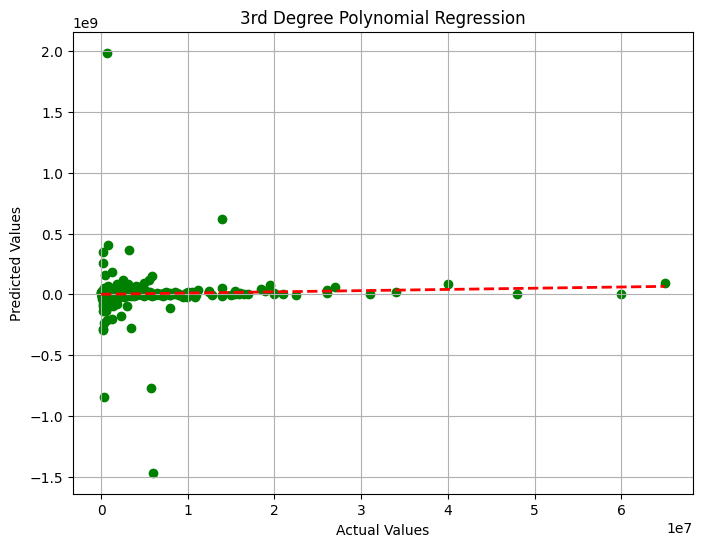

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('3rd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [125]:
#cross knn
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
cross_val_scores_knn = cross_val_score(knn_model, X, y, cv=rkf, scoring='r2')
print(cross_val_scores_knn)

[-5.42552855e+01 -4.46085242e-01  9.69576847e-02  9.31120111e-03
  2.57633213e-01  8.45230892e-03 -2.62591581e+01  1.46288708e-01
 -6.05465866e-01 -4.67718982e+01 -9.29189281e+00  3.93675776e-03
  5.46785260e-03 -4.09250171e-03  2.44776473e-01]


In [126]:
#cross 3 stopien
repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_3 = PolynomialFeatures(3)
X_transformed_3 = poly_features_3.fit_transform(X)
cross_val_scores_3rd_degree = cross_val_score(linear_model, X_transformed_3, y, cv=repeat_kfold, scoring='r2')
print(cross_val_scores_3rd_degree)

[-2.05084760e+02 -1.46701830e+04 -8.13793956e+02 -2.78952264e-02
 -2.02349979e+02 -2.77028847e-02 -5.14882719e+02 -1.80422833e+02
 -3.69578683e+04 -2.44651669e+02 -6.35657153e+02 -6.01769395e+01
 -1.01602975e-01 -9.23829773e+03 -7.57488081e+02]


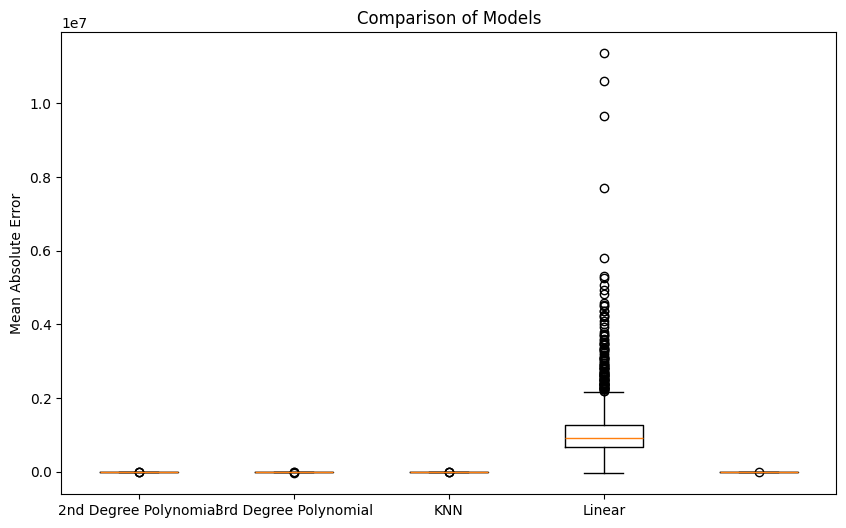

In [127]:
#boxplot dla wszystkich modeli
plt.figure(figsize=(10, 6))
plt.boxplot([cross_val_scores_2nd_degree, cross_val_scores_3rd_degree, cross_val_scores_knn,predictions_huber, cv_scores])
plt.xticks([1, 2, 3, 4], ['2nd Degree Polynomial', '3rd Degree Polynomial', 'KNN', 'Linear'])
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Models')
plt.show()
